In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Predicting MNIST dataset using MLP Model 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers, optimizers, datasets, utils, losses

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255
x_train = x_train[:1024,:]
x_test = x_test[:501,:]
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)
y_train = y_train[:1024,:]
y_test = y_test[:501,:]
print(y_train.shape)
print(x_train.shape)
# print(x_orig[:1,:]/255)

11493376/11490434 [==============================] - 0s 0us/step
(1024, 10)
(1024, 784)


In [ ]:
inputs = layers.Input(shape=(784,))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)

outputs= layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)

model.compile(loss='categorical_crossentropy',
              optimizer='Nadam', metrics=['accuracy'])

history=model.fit(x_train, y_train,
            batch_size=128,
            epochs=10,
            validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0],'Test accuracy:', score[1])

Epoch 1/10
8/8 [==============================] - 0s 26ms/step - loss: 2.1989 - accuracy: 0.2627 - val_loss: 1.9959 - val_accuracy: 0.4850
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 1.5103 - accuracy: 0.6172 - val_loss: 1.2765 - val_accuracy: 0.5828
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 0.8813 - accuracy: 0.7451 - val_loss: 0.9575 - val_accuracy: 0.6806
Epoch 4/10
8/8 [==============================] - 0s 7ms/step - loss: 0.5110 - accuracy: 0.8477 - val_loss: 0.7716 - val_accuracy: 0.7325
Epoch 5/10
8/8 [==============================] - 0s 7ms/step - loss: 0.3564 - accuracy: 0.9043 - val_loss: 0.5529 - val_accuracy: 0.8303
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.2522 - accuracy: 0.9248 - val_loss: 0.6129 - val_accuracy: 0.7884
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 0.2049 - accuracy: 0.9443 - val_loss: 0.4825 - val_accuracy: 0.8363
Epoch 8/10
8/8 [=================

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


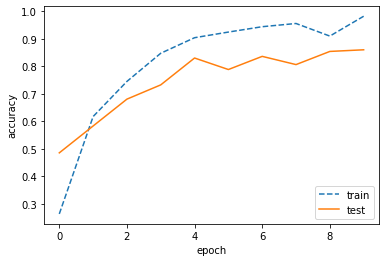

In [ ]:
# Plotting learning curves
plt.plot(history.history['accuracy'],'--')
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

(60000, 28, 28)


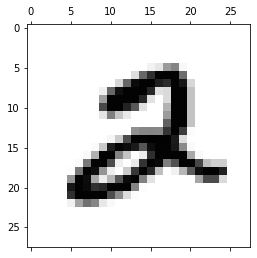

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers, optimizers, datasets, utils, losses
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
print(np.shape(x_train))
plt.matshow(255-x_train[5,:,:], cmap='gray')

Predicting MNIST dataset using CNN Model

In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1)/255
x_train = x_train[:1024,:,:,:]
x_test = x_test.reshape(10000, 28, 28, 1)/255
x_test = x_test[:501,:,:,:]
y_train = utils.to_categorical(y_train[:1024], 10)
y_test = utils.to_categorical(y_test[:501], 10)


In [ ]:
inputs = layers.Input(shape=(28, 28, 1,))
x=layers.Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
x=layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x=layers.MaxPooling2D(pool_size=(2, 2))(x)
x=layers.Dropout(0.25)(x)
x=layers.Flatten()(x)
x=layers.Dense(128, activation='relu')(x)
x=layers.Dropout(0.5)(x)
outputs=layers.Dense(10, activation='softmax')(x)

In [ ]:
model = models.Model(inputs=inputs, outputs=outputs)

model.compile(loss=losses.categorical_crossentropy,
              optimizer=optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
8/8 [==============================] - 0s 32ms/step - loss: 2.3056 - accuracy: 0.1152 - val_loss: 2.3045 - val_accuracy: 0.1018
Epoch 2/12
8/8 [==============================] - 0s 12ms/step - loss: 2.3037 - accuracy: 0.1084 - val_loss: 2.3040 - val_accuracy: 0.1058
Epoch 3/12
8/8 [==============================] - 0s 11ms/step - loss: 2.3046 - accuracy: 0.1133 - val_loss: 2.3034 - val_accuracy: 0.1078
Epoch 4/12
8/8 [==============================] - 0s 12ms/step - loss: 2.3062 - accuracy: 0.1123 - val_loss: 2.3029 - val_accuracy: 0.1098
Epoch 5/12
8/8 [==============================] - 0s 10ms/step - loss: 2.3054 - accuracy: 0.1182 - val_loss: 2.3023 - val_accuracy: 0.1118
Epoch 6/12
8/8 [==============================] - 0s 10ms/step - loss: 2.3049 - accuracy: 0.1055 - val_loss: 2.3017 - val_accuracy: 0.1118
Epoch 7/12
8/8 [==============================] - 0s 11ms/step - loss: 2.2997 - accuracy: 0.1299 - val_loss: 2.3012 - val_accuracy: 0.1138
Epoch 8/12
8/8 [===========

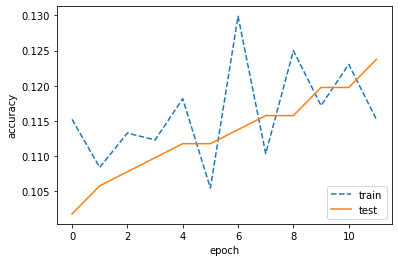

In [ ]:
plt.plot(history.history['accuracy'],'--')
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers, optimizers, datasets, utils, losses

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)/255
x_train = x_train[:1024,:,:,:]
x_test = x_test.reshape(10000, 28, 28, 1)/255
x_test = x_test[:501,:,:,:]
y_train = utils.to_categorical(y_train[:1024], 10)
y_test = utils.to_categorical(y_test[:501], 10)

In [ ]:
from scipy import ndimage
print(x_train.shape)
x_train = ndimage.zoom(x_train, [1,8,8,3])
print(x_train.shape)

print(x_test.shape)
x_test = ndimage.zoom(x_test, [1,8,8,3])
print(x_test.shape)

(1024, 28, 28, 1)
(1024, 224, 224, 3)
(501, 28, 28, 1)
(501, 224, 224, 3)


Predicting MNIST dataset using VGG16 pre-trained model, without retraining any layers.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# create the base pre-trained model
base_model = VGG16(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model on the new data for a few epochs

history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
8/8 [==============================] - 8s 1s/step - loss: 2.2700 - accuracy: 0.1758 - val_loss: 1.9681 - val_accuracy: 0.2076
Epoch 2/12
8/8 [==============================] - 5s 652ms/step - loss: 1.8493 - accuracy: 0.4238 - val_loss: 1.6981 - val_accuracy: 0.4810
Epoch 3/12
8/8 [==============================] - 5s 660ms/step - loss: 1.5911 - accuracy: 0.5986 - val_loss: 1.5893 - val_accuracy: 0.4990
Epoch 4/12
8/8 [==============================] - 5s 661ms/step - loss: 1.4323 - accuracy: 0.6289 - val_loss: 1.3409 - val_accuracy: 0.5768
Epoch 5/12
8/8 [==============================] - 5s 663ms/step - loss: 1.2548 - accuracy: 0.7012 - val_loss: 1.2319 - val_accuracy: 0.6347
Epoch 6/12
8/8 [==============================] - 5s 665ms/step - loss: 1.1017 - accuracy: 0.7227 - val_loss: 1.1103 - val_accuracy: 0.6587
Epoch 7/12
8/8 [==============================] - 5s 664ms/step - loss: 0.9935 - accuracy: 0.7764 - val_loss: 1.0229 - val_accuracy: 0.6507
Epoch 8/12
8/8 [=======

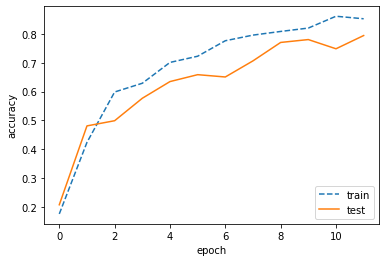

In [ ]:
plt.plot(history.history['accuracy'],'--')
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Predicting MNIST dataset using VGG16 pre-trained model, retraining last three layers.


In [ ]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

for layer in model.layers[:15]:
   layer.trainable = False
for layer in model.layers[15:]:
   layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=15,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

0 input_4
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
Epoch 1/15
8/8 [==============================] - 6s 733ms/step - loss: 0.5637 - accuracy: 0.8779 - val_loss: 0.6332 - val_accuracy: 0.8363
Epoch 2/15
8/8 [==============================] - 6s 749ms/step - loss: 0.4974 - accuracy: 0.8945 - val_loss: 0.5841 - val_accuracy: 0.8303
Epoch 3/15
8/8 [==============================] - 6s 755ms/step - loss: 0.4425 - accuracy: 0.9160 - val_loss: 0.5481 - val_accuracy: 0.8503
Epoch 4/15
8/8 [==============================] - 6s 761ms/step - loss: 0.4089 - accuracy: 0.9189 - val_loss: 0.5211 - val_accuracy: 0.8683
Epoch 5/15
8/8 [==============================] - 6s 762ms/step - loss: 0.3838 - accuracy: 0.9268 - val_loss: 0.4973 - val_accuracy: 0.8643
Epoch 6/15
8/8 [

# New Section

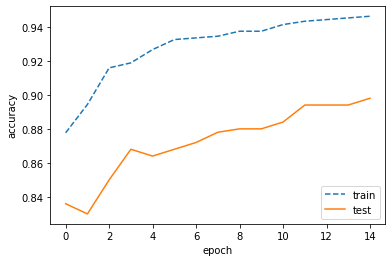

In [ ]:
plt.plot(history.history['accuracy'],'--')
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Predicting MNIST dataset using VGG16 and retraining last 9 layers

In [ ]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

for layer in model.layers[:9]:
   layer.trainable = False
for layer in model.layers[9:]:
   layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=15,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

0 input_4
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
Epoch 1/15
8/8 [==============================] - 8s 965ms/step - loss: 0.2545 - accuracy: 0.9463 - val_loss: 0.3551 - val_accuracy: 0.9062
Epoch 2/15
8/8 [==============================] - 8s 1s/step - loss: 0.2421 - accuracy: 0.9473 - val_loss: 0.3404 - val_accuracy: 0.9062
Epoch 3/15
8/8 [==============================] - 8s 1s/step - loss: 0.2270 - accuracy: 0.9580 - val_loss: 0.3234 - val_accuracy: 0.9082
Epoch 4/15
8/8 [==============================] - 8s 1s/step - loss: 0.2114 - accuracy: 0.9502 - val_loss: 0.3050 - val_accuracy: 0.9142
Epoch 5/15
8/8 [==============================] - 8s 1s/step - loss: 0.1966 - accuracy: 0.9639 - val_loss: 0.2865 - val_accuracy: 0.9242
Epoch 6/15
8/8 [============

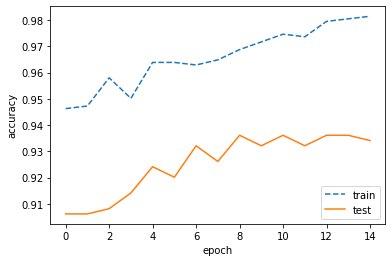

In [ ]:
plt.plot(history.history['accuracy'],'--')
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()